In [36]:
import time
import dask.bag as db
import matplotlib.pylab as plt
from functools import partial

In [37]:
timings = {}
block = 10
for i in range (1, 10) :
    print("Block size = ",  block)
    start_time = time.perf_counter()
    b = db.read_text('transcript.txt', blocksize=block)
    wordcount = b.str.split().flatten().frequencies().topk(10, lambda x: x[1])
    output = wordcount.compute()
    end_time = time.perf_counter()
    block = block * 10
    timings[i] = end_time-start_time

#What do you notice about the output?
print(output)

Block size =  10
Block size =  100
Block size =  1000
Block size =  10000
Block size =  100000
Block size =  1000000
Block size =  10000000
Block size =  100000000
Block size =  1000000000
[('and', 1553), ('to', 1390), ('the', 1326), ('of', 974), ('a', 951), ('that', 905), ('you', 733), ('in', 664), ('I', 664), ('we', 487)]


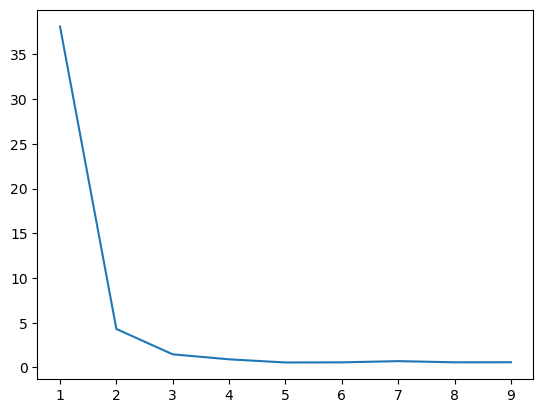

In [38]:
lists = sorted(timings.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

In [39]:
from concurrent.futures import ThreadPoolExecutor
from collections import Counter 

block = 10
TOP_20 = 20
stopword_set = set()

def filter_stopword(word):
    return word not in stopword_set

def filter_stopwords(words):
    return [word for word in words if filter_stopword(word)]

def process_block(block_text):
    cleaned_text = block_text.lower().replace(r'[^\w\s]', '') 
    words = cleaned_text.split()
    return filter_stopwords(words)

print("Block size =", block)
start_time = time.perf_counter()
b = db.read_text('transcript.txt', blocksize=block)

with ThreadPoolExecutor() as executor:
    word_counts = executor.map(process_block, b)

flat_words = [word for block in word_counts for word in block]
wordcount = Counter(flat_words).most_common(TOP_20)
output = wordcount
end_time = time.perf_counter()

print(output)
print("This run took", end_time - start_time)

Block size = 10
[('and', 1768), ('to', 1391), ('the', 1370), ('a', 987), ('of', 980), ('that', 932), ('you', 834), ('in', 679), ('i', 679), ('we', 598), ('so', 547), ('is', 471), ('for', 454), ('it', 417), ('have', 372), ('with', 336), ('are', 330), ('really', 289), ('this', 274), ('but', 266)]
This run took 28.051395799964666
